In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

# Import data

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Read data from `csv` files

In [ ]:
train_data_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/filtered_data.csv"
test_data_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/filtered_data_test.csv"

train_df = pd.read_csv(train_data_path).drop(columns = ["Condition"])
test_df = pd.read_csv(test_data_path).drop(columns = ["Condition"])

In [ ]:
#Classes:['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
Classes = {
    0:'N', 
    1:'S', 
    2:'V', 
    3:'F',
    4:'Q'
}

Classes_index = {
    'N': 0, 
    'S': 1, 
    'V': 2, 
    'F': 3, 
    'Q': 4
}

# Rename Columns

In [ ]:
feat_cols_name = [idx for idx in range(train_df.shape[1]-1)]

train_df.columns = feat_cols_name+["label"]
test_df.columns = feat_cols_name+["label"]

In [ ]:
train_df["label"] = train_df["label"].astype(int)
test_df["label"] = test_df["label"].astype(int)

In [ ]:
train_df["label"] = train_df["label"].map(Classes)
test_df["label"] = test_df["label"].map(Classes)

In [ ]:
train_df.columns[train_df.isnull().sum() != 0]
test_df.columns[train_df.isnull().sum() != 0]

Index([], dtype='object')

In [ ]:
train_df["label"] = train_df["label"].map(Classes_index)
test_df["label"] = test_df["label"].map(Classes_index)

In [ ]:
X_train = train_df[feat_cols_name].values
y_train = train_df["label"].values

X_test = test_df[feat_cols_name].values
y_test = test_df["label"].values

# Splitting the data into training set and validation set
10 % of the data was kept for validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2, stratify=y_train)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((70918, 187), (70918,), (7880, 187), (7880,))

In [ ]:
print(f"Shape of training data features = {X_train.shape}")
print(f"Shape of training data labels = {y_train.shape}")

print(f"Shape of validation data features = {X_val.shape}")
print(f"Shape of validation data labels = {y_val.shape}")

Shape of training data features = (70918, 187)
Shape of training data labels = (70918,)
Shape of validation data features = (7880, 187)
Shape of validation data labels = (7880,)


## Reshaping the data to fit the `convolution` layers.
Reshaped data is 3D and is of shape (number of features, height of features, 1)

In [ ]:
X_train = X_train.reshape((-1, len(feat_cols_name), 1))
X_val = X_val.reshape((-1, len(feat_cols_name), 1))
X_test = X_test.reshape((-1, len(feat_cols_name), 1))

y_train = y_train.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))


print(f"Shape of training data features after reshaping = {X_train.shape}")
print(f"Shape of training data labels after reshaping = {y_train.shape}")

print()

print(f"Shape of validation data features after reshaping = {X_val.shape}")
print(f"Shape of validation data labels after reshaping = {y_val.shape}")

print()

print(f"Shape of testing data features after reshaping = {X_test.shape}")
print(f"Shape of testing data labels after reshaping = {y_test.shape}")

Shape of training data features after reshaping = (70918, 187, 1)
Shape of training data labels after reshaping = (70918, 1)

Shape of validation data features after reshaping = (7880, 187, 1)
Shape of validation data labels after reshaping = (7880, 1)

Shape of testing data features after reshaping = (21892, 187, 1)
Shape of testing data labels after reshaping = (21892, 1)


In [ ]:
input_shape = X_train.shape[1:] # Input shape for filling in model
nb_classes = len(Classes_index.keys()) # Number of classes in the data

print(f"Input shape = {input_shape}")
print(f"Number of labels = {nb_classes}")

Input shape = (187, 1)
Number of labels = 5


In [ ]:
from tensorflow.keras.utils import to_categorical


# Convert labels to categorical 2d matrices
y_train = to_categorical(y_train, num_classes=nb_classes)
y_val = to_categorical(y_val, num_classes=nb_classes)
y_test = to_categorical(y_test, num_classes=nb_classes)

print(f"Shape of training labels = {y_train.shape}")
print(f"Shape of validation labels = {y_val.shape}")
print(f"Shape of testing labels = {y_test.shape}")

Shape of training labels = (70918, 5)
Shape of validation labels = (7880, 5)
Shape of testing labels = (21892, 5)


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


# Define a function to get the validation metrices
def print_score(y_pred : np.ndarray, y_real : np.ndarray, label_encoder, file = None) -> None:
    # Prints model validation metrics
    
    print("Accuracy: ", accuracy_score(y_real, y_pred), file = file)
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"),
          file = file)
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"), file = file)
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"),
          file = file)

    print( "\n", file = file)
    print("Macro precision_recall_fscore_support (macro) average", file = file)
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"), 
          file= file)

    print("\n", file = file)
    print("Macro precision_recall_fscore_support (micro) average", file = file)
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"),
          file = file)

    print("\n", file = file)
    print("Macro precision_recall_fscore_support (weighted) average",
          file = file)
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"), 
          file = file)
    
    print("\n", file = file)
    print("Confusion Matrix", file = file)
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder],
                  columns = [i for i in label_encoder])
    plt.figure(figsize = (10,10))
    sn.heatmap(df_cm, annot=True)
    plt.ylabel("True label", fontsize = 15)
    plt.xlabel("Predicted label", fontsize = 15)
    plt.savefig("conf_matrix.jpg")

    print("\n", file = file)
    print("Classification Report", file = file)
    print(classification_report(y_real, y_pred, target_names=label_encoder), 
          file = file)

In [ ]:
from keras.layers import Conv1D, MaxPool1D, Concatenate, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import time

In [ ]:
import keras.backend as K

def f1_score(y_true, y_pred):
    """Calculate the f1_score"""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
class Classifier_INCEPTION:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=100):
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs

        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):

        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(4)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    def build_model(self, input_shape, nb_classes):
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):

            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall(), f1_score])

        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train, 
                              batch_size=mini_batch_size, 
                              epochs=self.nb_epochs,
                              verbose=self.verbose, 
                              validation_data=(x_val, y_val), 
                              callbacks=self.callbacks)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist

In [ ]:
weights_directory = "./"
inception = Classifier_INCEPTION(weights_directory, input_shape, nb_classes, 1, 
                                 batch_size=128, build=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 max_pooling1d_10 (MaxPooling1D  (None, 187, 1)      0           ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 conv1d_62 (Conv1D)             (None, 187, 32)      1280        ['input_2[0][0]']                
                                                                                                  
 conv1d_63 (Conv1D)             (None, 187, 32)      640         ['input_2[0][0]']          

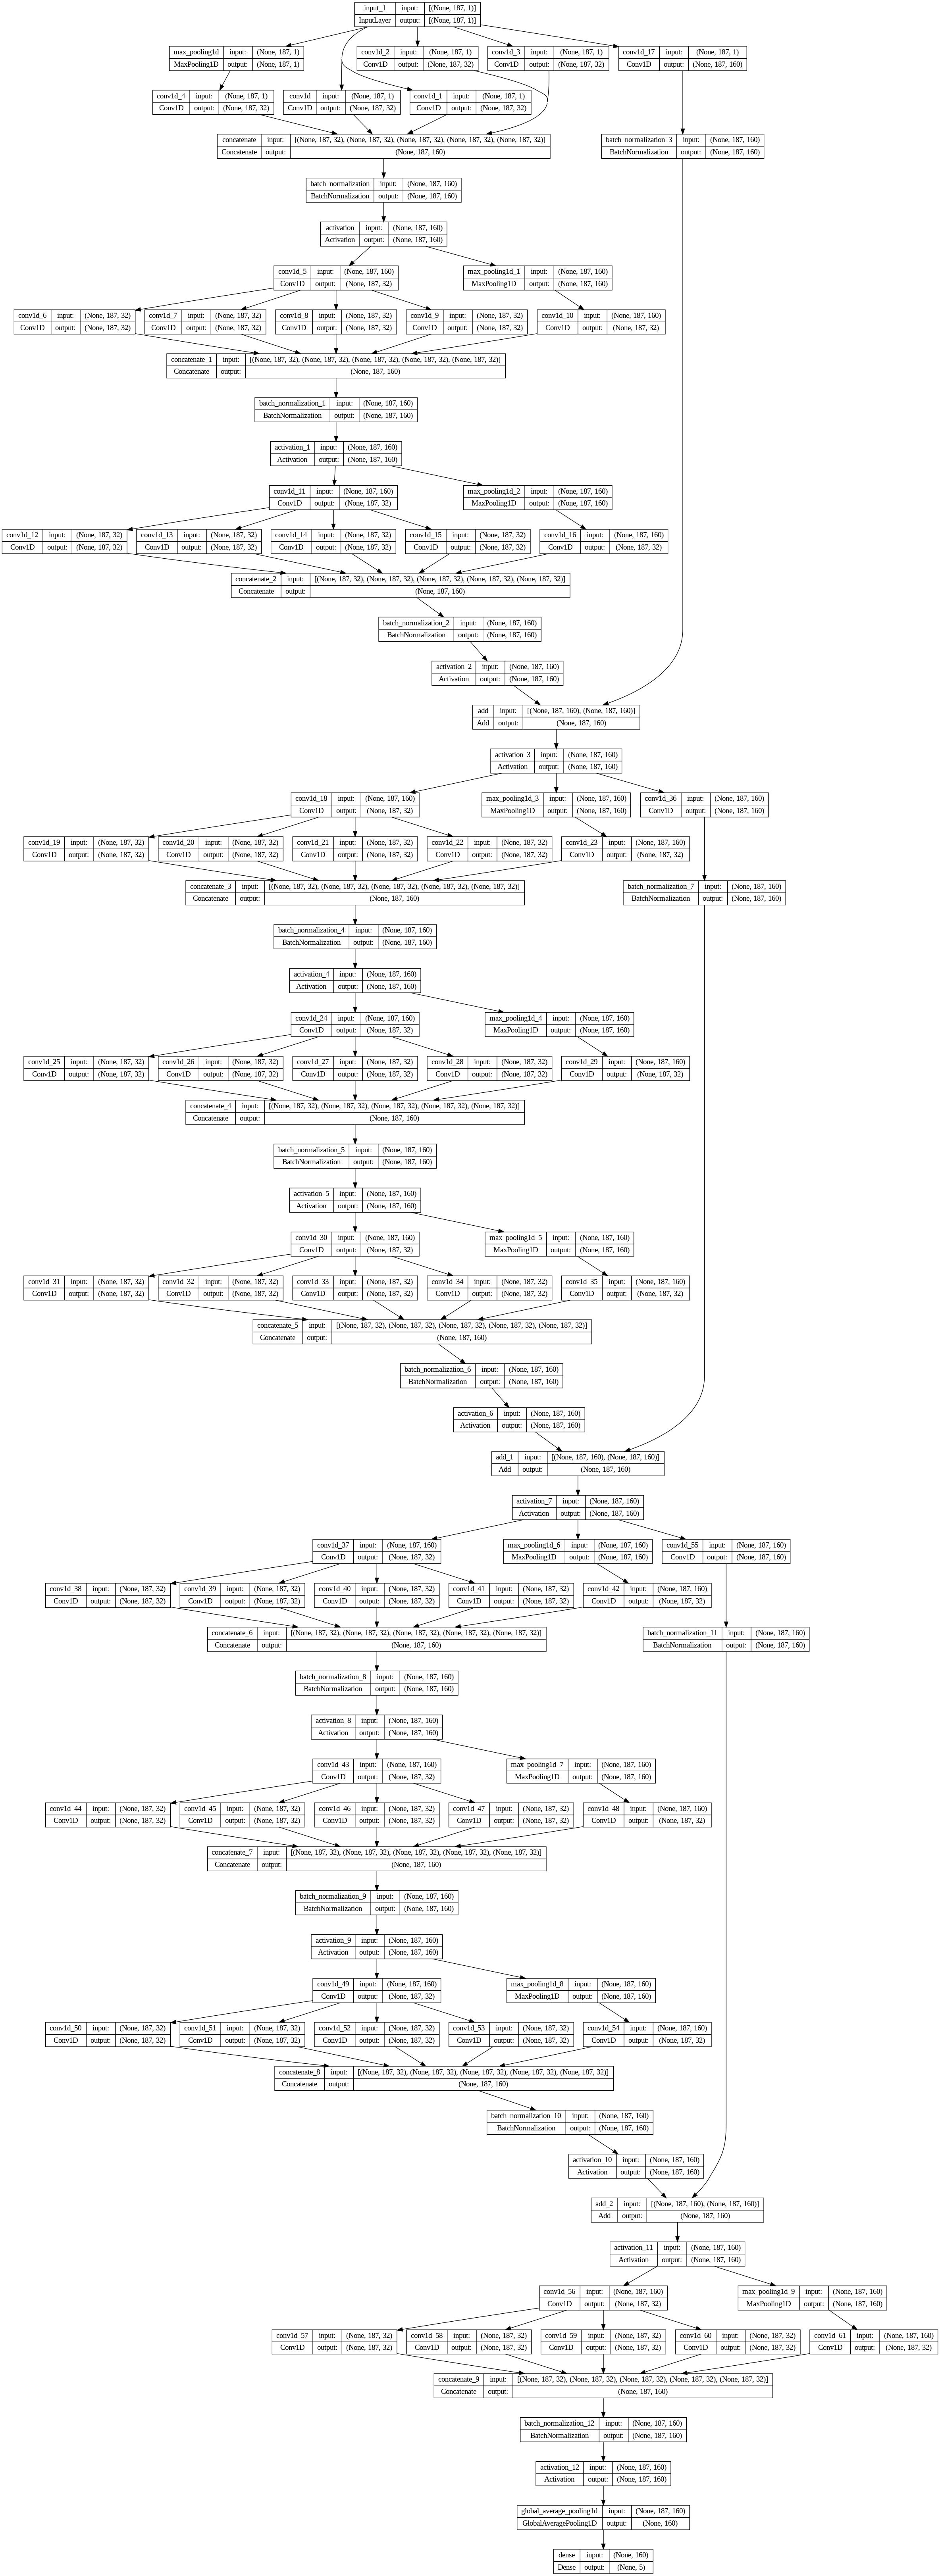

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(inception.model, to_file="model_fig.jpg", show_shapes=True)

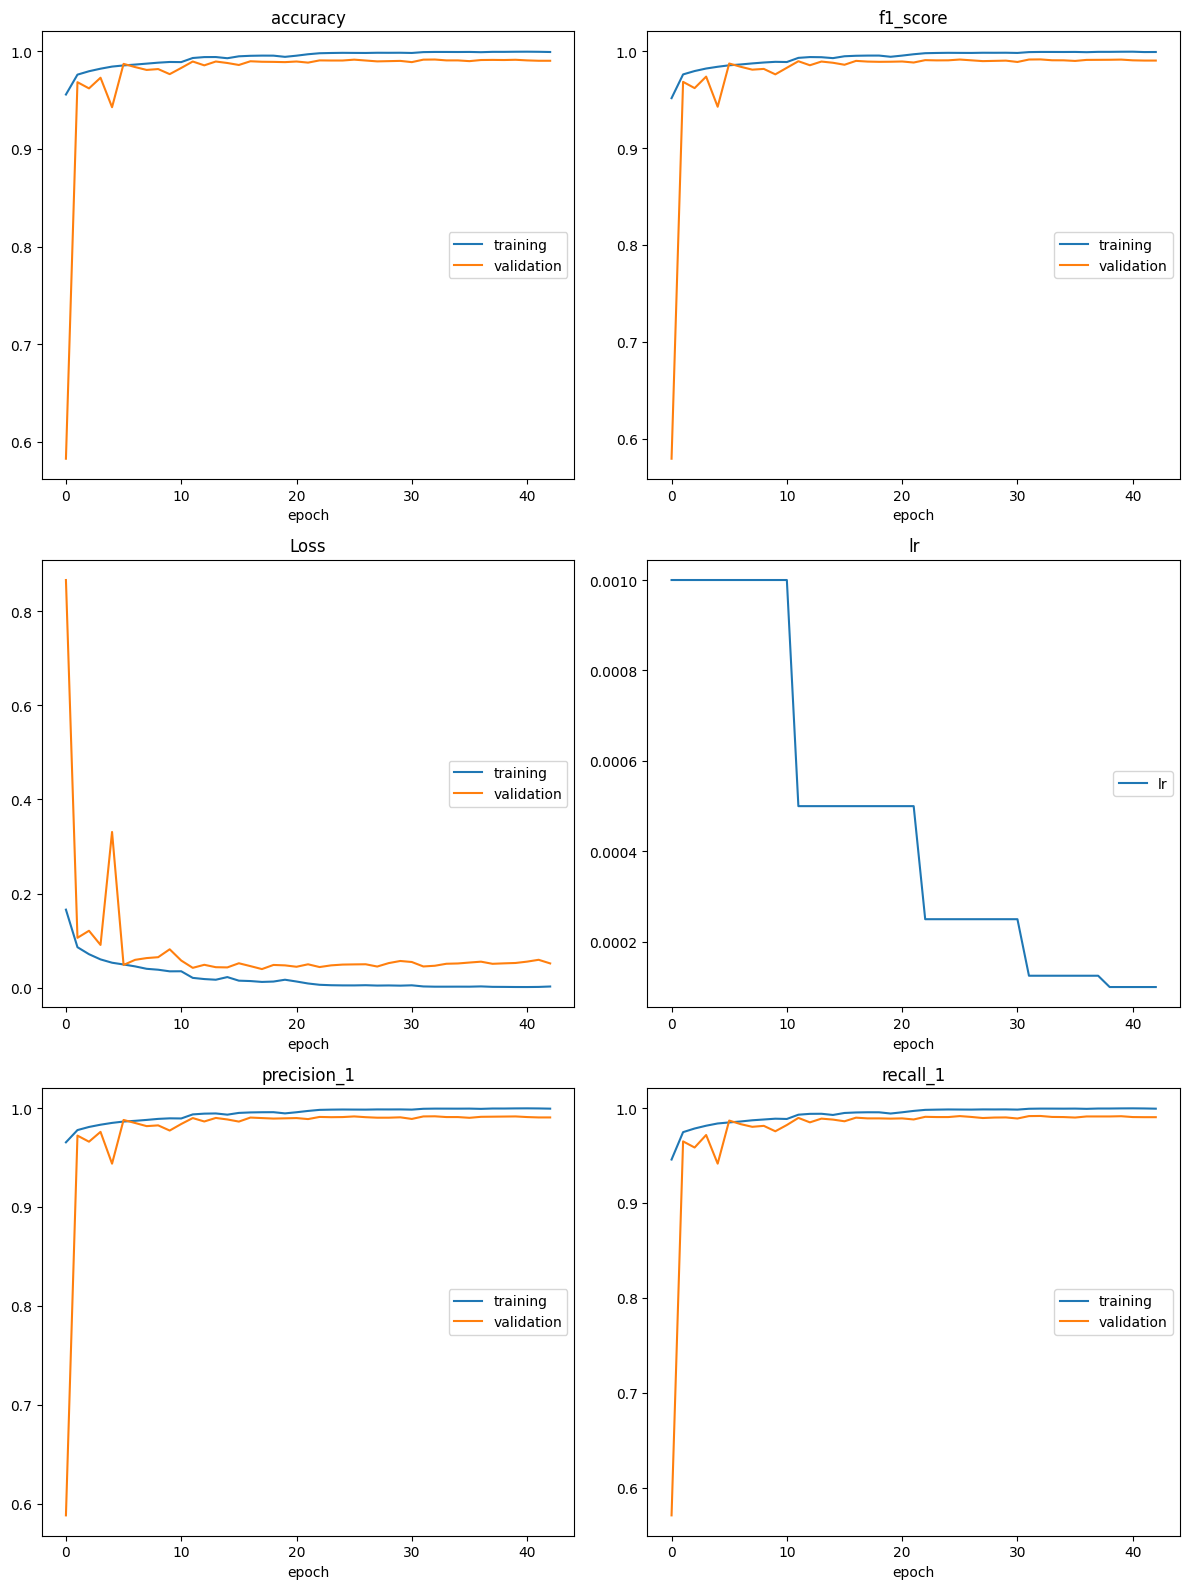

accuracy
	training         	 (min:    0.956, max:    1.000, cur:    0.999)
	validation       	 (min:    0.583, max:    0.992, cur:    0.990)
f1_score
	training         	 (min:    0.952, max:    1.000, cur:    0.999)
	validation       	 (min:    0.579, max:    0.992, cur:    0.990)
Loss
	training         	 (min:    0.001, max:    0.166, cur:    0.002)
	validation       	 (min:    0.039, max:    0.867, cur:    0.051)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
precision_1
	training         	 (min:    0.965, max:    1.000, cur:    0.999)
	validation       	 (min:    0.588, max:    0.992, cur:    0.990)
recall_1
	training         	 (min:    0.946, max:    1.000, cur:    0.999)
	validation       	 (min:    0.571, max:    0.992, cur:    0.990)
555/555 [==============================] - 64s 116ms/step - loss: 0.0022 - accuracy: 0.9993 - precision_1: 0.9994 - recall_1: 0.9993 - f1_score: 0.9993 - val_loss: 0.0513 - val_accuracy: 0.9904 - val_precision_1: 0.9905 - val_r

In [ ]:
history = inception.fit(X_train, y_train, X_val, y_val)

In [ ]:
inception.model.load_weights("./best_weights.h5")

In [ ]:
inception.model.evaluate(X_val, y_val)

247/247 [==============================] - 4s 14ms/step - loss: 0.0463 - accuracy: 0.9916 - precision_1: 0.9916 - recall_1: 0.9916 - f1_score: 0.9916


[0.04634295031428337,
 0.9916243553161621,
 0.9916243553161621,
 0.9916243553161621,
 0.9916498064994812]

In [ ]:
inception.model.evaluate(X_test, y_test)

685/685 [==============================] - 8s 12ms/step - loss: 0.0635 - accuracy: 0.9889 - precision_1: 0.9889 - recall_1: 0.9889 - f1_score: 0.9889


[0.06353892385959625,
 0.988945722579956,
 0.9889452457427979,
 0.9889000654220581,
 0.9889352321624756]

In [ ]:
y_hat = inception.model.predict(X_test)

685/685 [==============================] - 6s 9ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(list(label_encoder.keys())[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.locator_params(axis = "both", nbins = 30)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.savefig("confusion_matrix.jpg")
    plt.show()

Accuracy:  0.9889457336013155
Precision::  0.9889457336013155
Recall::  0.9889457336013155
F1_Score::  0.9889457336013155


Macro precision_recall_fscore_support (macro) average
(0.9406403165831232, 0.926800070972243, 0.9333578294950524, None)


Macro precision_recall_fscore_support (micro) average
(0.9889457336013155, 0.9889457336013155, 0.9889457336013155, None)


Macro precision_recall_fscore_support (weighted) average
(0.9888223845583806, 0.9889457336013155, 0.988832873256504, None)


Confusion Matrix


Classification Report
              precision    recall  f1-score   support

           N       0.99      1.00      0.99     18118
           S       0.92      0.85      0.88       556
           V       0.98      0.96      0.97      1448
           F       0.81      0.84      0.83       162
           Q       1.00      0.99      1.00      1608

    accuracy                           0.99     21892
   macro avg       0.94      0.93      0.93     21892
weighted avg       0.99      0.

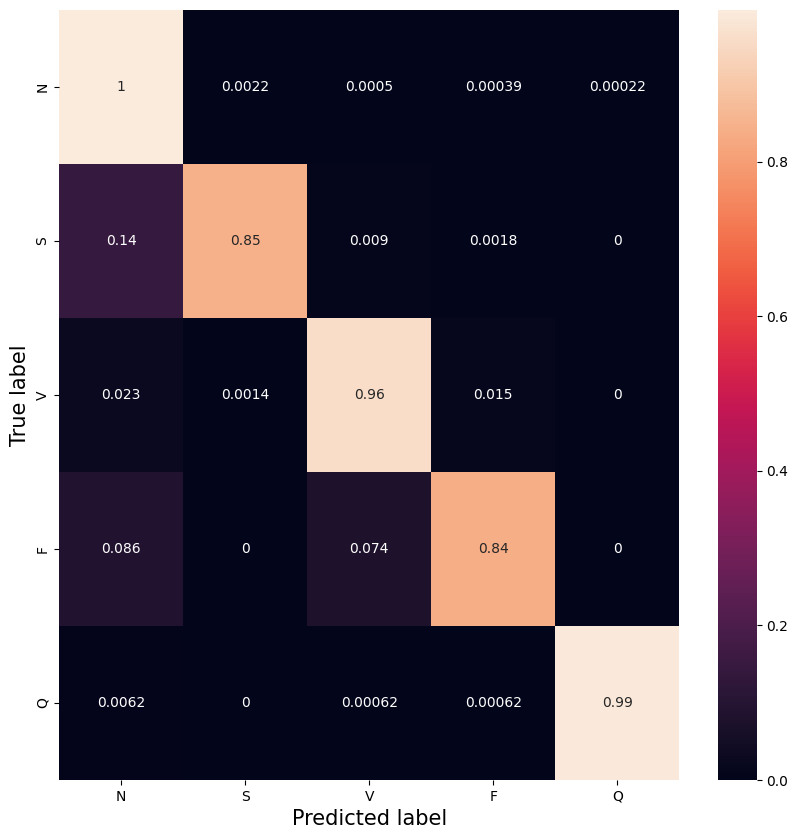

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_hat = np.argmax(y_hat, axis=1)


print_score(y_hat, y_true, Classes_index)

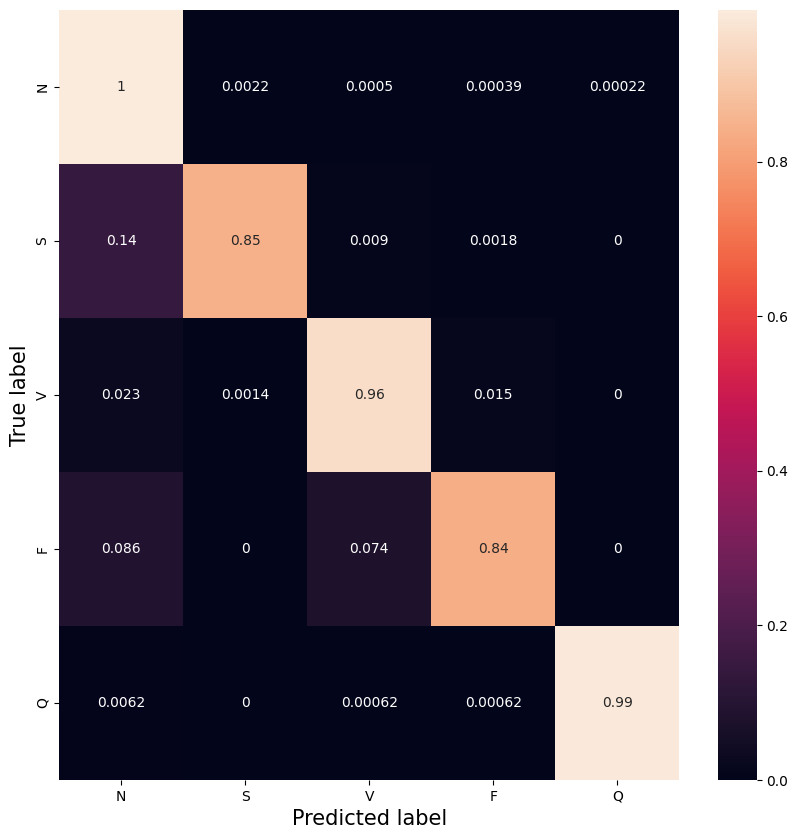

In [ ]:
with open("validation_scores.txt", "w+") as file:
    print_score(y_hat, y_true, Classes_index, file = file)

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,precision_1,recall_1,f1_score,val_loss,val_accuracy,val_precision_1,val_recall_1,val_f1_score,lr
0,0.165671,0.955766,0.965341,0.945712,0.951652,0.866824,0.582614,0.588459,0.570685,0.579166,0.001
1,0.085823,0.976141,0.977706,0.974590,0.976177,0.105758,0.968401,0.972126,0.964848,0.968490,0.001
2,0.070899,0.979624,0.980860,0.978426,0.979671,0.120760,0.962056,0.965976,0.958376,0.962037,0.001
3,0.059846,0.982233,0.983133,0.981359,0.982272,0.090630,0.972970,0.975908,0.971574,0.973909,0.001
4,0.052789,0.984390,0.984964,0.983728,0.984083,0.330884,0.942766,0.943766,0.941371,0.942769,0.001


In [ ]:
history_df.to_csv("history.csv")

In [ ]:
print(inception.model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 max_pooling1d_10 (MaxPooling1D  (None, 187, 1)      0           ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 conv1d_62 (Conv1D)             (None, 187, 32)      1280        ['input_2[0][0]']                
                                                                                                  
 conv1d_63 (Conv1D)             (None, 187, 32)      640         ['input_2[0][0]']          

AttributeError: ignored

In [ ]:
dir(inception.model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_weight_warning',
 '_checkpoint',
 '_checkpoint_dependencies',
 '